In [2]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as lin

<img style="width:900px" src="hw4-1.jpg">

## Question 2 
Heat equation in the unit square $[0,1]*[0,1]$, with initial condition u(0,x,y) = sin(pi*x)sin(pi*y), and boundary condition u=0

Since the ADI method is unconditional stable, it has no restricion on choosing 
Assume $\Delta y=\Delta x = h = \frac{1}{M} $， choose $\Delta t = k =0.01$ 

$r=\frac{k}{2*h^2}$, Implement tridiagonal solver twice:

$-rU_{j-1,l}^{n+1/2} +(1+2r)U_{j,l}^{n+1/2} - rU_{j+1,l}^{n+1/2} = rU_{j,l-1}^{n} +(1-2r)U_{j,l}^{n} +rU_{j,l+1}^{n} $

$-rU_{j,l-1}^{n+1}+(1+2r)U_{j,l}^{n+1}-rU_{j,l+1}^{n+1}=rU_{j-1,i}^{n+1/2}+(1-2r)U_{j,l}^{n+1/2}+rU_{j+1,l}^{n+1/2} $

In [3]:
#initial Condition function
def ic(j,l,h):
    return math.sin(math.pi*h*j)*math.sin(math.pi*h*l)

In [4]:
def ADI(M,n_stop):
    h=1/M 
    k=0.005
    r = k/(2*h**2)
    u= np.zeros((M-1,M-1)) # solution array
    ui = u.copy()          # Intermediate solution
    up = u.copy()          # solution at n+1
    for j in range(1,M):
        for l in range(1,M):
            u[j-1,l-1] = ic(j,l,h)   
    A=np.zeros((M-1,M-1))
    for i in range (0,M-1): 
        A[i,i] = 1+2*r
        if i > 0: 
            A[i, i - 1] = -r
            A[i - 1, i] = -r
    for k in range(n_stop):
        for j in range (M-1): 
            b = r*u[j] + (1-2*r)*u[j]+r*u[j]
            ui[j] = lin.solve(A,b)
        for l in range(M-1):
            c = r*ui[l] + (1-2*r)*ui[l]+r*ui[l]
            up[l] = lin.solve(A,c)
        # update u with up and do next step 
        u = up
    u_with_boundary = np.zeros((M+1,M+1))
    u_with_boundary[1:-1,1:-1] =u
    return u_with_boundary

In [5]:
up=ADI(50,1)

Text(0.5, 0.92, 'time step = 1')

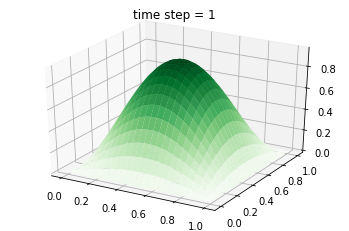

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
M=50
x =np.linspace(0,1,M+1)
y=np.linspace(0,1,M+1)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y,up, cmap='Greens')
ax.set_title("time step = 1")


## Order of convergence, it should be O(h)^2


In [7]:
# Double the x,y step size
up_2 = ADI(100,1)
up_4 = ADI(200,1)


## To find the order of convergence, use $p = log_2{\frac{(A_{h/2} - A_h)}{(A_{h/4} - A_{h/2})}}$

In [8]:
p = np.log2((up_2[-2,-2] - up[-2,-2])/(up_4[-2,-2] - up_2[-2,-2]))
print("P is", p," which is approximately 2, the order of convergence")

P is 1.998240978536745  which is approximately 2, the order of convergence


## C Plot numerical approximation at three times that illustrate well its time evolution

In [9]:
up_t2 = ADI(50,10)
up_t3 = ADI(50,50)

Text(0.5, 0.92, 'Time Step = 50')

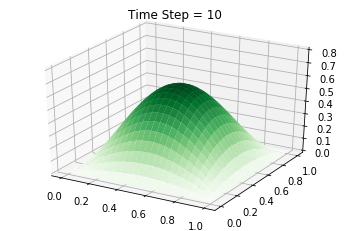

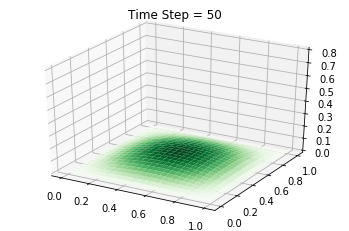

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x =np.linspace(0,1,50+1)
y=np.linspace(0,1,50+1)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y,up_t2, cmap='Greens')
ax.set_zlim(0,0.8)
ax.set_title("Time Step = 10")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,up_t3, cmap='Greens')
ax.set_zlim(0,0.8)
ax.set_title("Time Step = 50")

#### As we can see from time step= 1,10,50, as time evolves, the surface become flatter.

## d
ADI is preferable, because it is more efficient to reduce the 2D problem into two 1-D problems and use tridiagonal solver for each. Crank Nicolson need to solve Linear system of equation and it cannot be labeled as tridiagonal system. By VonNeumanna analysis, if $\alpha = k/h^2$ is large, Crank Nicolson method contains oscillations.